In [1]:
# Import necessary libraries
import numpy as np                  # Import NumPy for numerical operations
import matplotlib.pyplot as plt    # Import Matplotlib for data visualization

# Import libraries for machine learning tasks
from sklearn.model_selection import train_test_split  # Import train_test_split for data splitting
from sklearn.linear_model import LinearRegression, SGDRegressor  # Import LinearRegression and SGDRegressor for modeling
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # Import PolynomialFeatures and StandardScaler for data preprocessing
from sklearn.metrics import r2_score  # Import r2_score for model evaluation
from sklearn.pipeline import Pipeline  # Import Pipeline for creating a modeling pipeline


`np.random.rand()` is a NumPy function used to generate random numbers from a uniform distribution over the half-open interval `[0.0, 1.0)`. This means that the generated numbers are greater than or equal to 0.0 and less than 1.0. It returns random numbers in the form of a NumPy array.

Here are the key details about `np.random.rand()`:

- **Arguments**: Unlike some other random number generation functions in NumPy, `np.random.rand()` does not take any arguments. You simply call it without passing any parameters.

- **Shape Control**: You can control the shape of the output array by using the standard NumPy array reshaping methods. For example, if you want a 2x3 array of random numbers between 0 and 1, you can reshape the output like this:


In [2]:
np.random.rand()

0.42961543523558765

In [3]:
random_array = np.random.rand(2, 3)
random_array

array([[0.37477925, 0.54068974, 0.79047035],
       [0.12601461, 0.41627259, 0.37813309]])

- **Uniform Distribution**: The function generates random numbers from a uniform distribution. This means that each number in the generated array is equally likely to fall within the interval `[0.0, 1.0)`.

- **No Seed Control**: By default, NumPy uses a system-dependent seed value to initialize the random number generator. This means that calling `np.random.rand()` without setting a seed will produce different random numbers each time it's called. If you want to produce reproducible results, you can set the seed using `np.random.seed()`.

- **Applications**: `np.random.rand()` is often used when you need random values between 0 and 1 for various tasks in simulations, statistical analysis, and machine learning. You can scale these values and use them as random coefficients, probabilities, or initializations for various algorithms.

In summary, `np.random.rand()` is a convenient way to generate random numbers from a uniform distribution in NumPy without the need for additional arguments. It's a versatile function used in various applications involving randomness and probability.

In [4]:
(6 * np.random.rand(200, 1)-3).min(),(6 * np.random.rand(200, 1)-3).max()

(-2.9350269666579623, 2.9590383703718084)

In [5]:
# Generate 200 random numbers between -3 and 3, and store them in a 2D array 'X'
# The formula used to generate these random numbers is: X = 6 * np.random.rand(200, 1) - 3
X = 6 * np.random.rand(200, 1) - 3

# Create a target variable 'y' based on a quadratic equation
# The formula for 'y' is: y = 0.8 * X^2 + 0.9 * X + 2
# Add some random noise to 'y' to simulate real-world data
# The 'np.random.randn(200, 1)' part introduces random noise
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# The purpose of the above code is to generate synthetic data (X and y) for a machine learning experiment.
# X represents the input features, and y represents the corresponding output labels.
# The data follows a quadratic relationship defined by the formula for 'y'.
# Noise is added to make the data more realistic and representative of actual data.


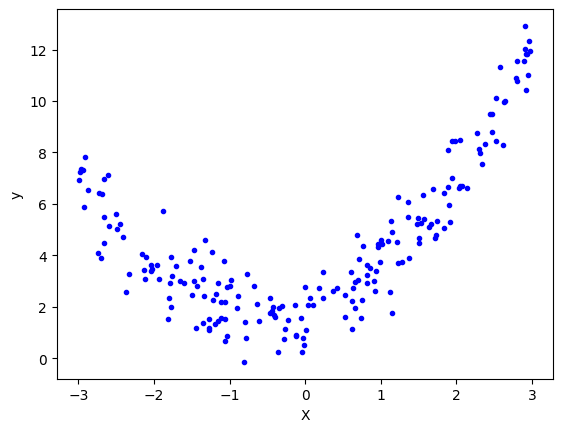

In [6]:
# Create a scatter plot of X versus y using blue dots
plt.plot(X, y, 'b.')

# Label the x-axis
plt.xlabel("X")

# Label the y-axis
plt.ylabel("y")

# Display the plot
plt.show()

# This code is written to create a scatter plot that visualizes the relationship between two variables X and y.
# X represents the input variable or feature data, and y represents the output variable or target data.
# The 'b.' argument in plt.plot() specifies that blue dots should be used to plot the data points.
# The x-axis is labeled with "X" using plt.xlabel(), and the y-axis is labeled with "y" using plt.ylabel().
# Finally, plt.show() displays the plot to visualize the data.


In [7]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
# Applying linear regression
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.20339226789874165

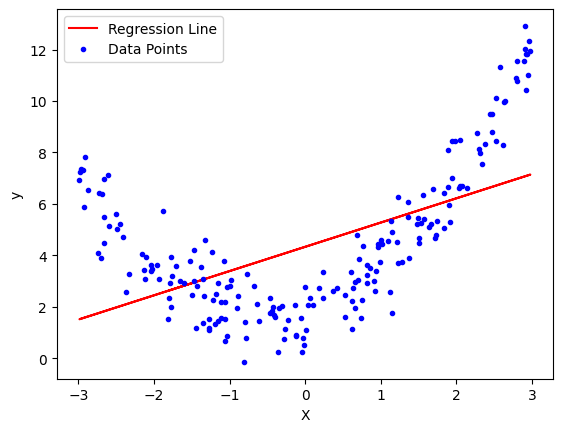

In [11]:
# X_train is the input data for training, lr is the trained linear regression model,
# X is the input data for plotting, and y is the corresponding target values.

# Plot the predicted values based on the training data using the linear regression model
plt.plot(X_train, lr.predict(X_train), color='r', label='Regression Line')

# Plot the actual data points (X, y) as blue dots
plt.plot(X, y, "b.", label='Data Points')

# Add labels to the x and y axes
plt.xlabel("X")
plt.ylabel("y")

# Show the legend to distinguish between the regression line and data points
plt.legend()

# Display the plot
plt.show()

# The above code is written to visualize the performance of a linear regression model.
# It first plots the predicted values generated by the trained model (lr.predict(X_train))
# as a red line, representing the regression line.
# Then, it plots the actual data points (X, y) as blue dots.
# The X-axis represents the input variable, and the Y-axis represents the target variable.
# This visualization helps to assess how well the linear regression model fits the data.


## **`Polynomial Regression in Machine Learning: Understanding and Implementation:-`**

Polynomial regression is a versatile technique for modeling nonlinear relationships in machine learning. This guide explains how polynomial regression works and provides a step-by-step approach to dealing with it effectively.
Polynomial regression is a type of regression analysis used in machine learning to model the relationship between a dependent variable (target) and one or more independent variables (features) as an nth-degree polynomial. While linear regression models relationships as a straight line, polynomial regression allows you to capture more complex, nonlinear relationships in the data.

Here's how polynomial regression works and how to deal with it:

1. **Polynomial Equation**: The general form of a polynomial regression equation with one independent variable (univariate) is:

   ```
   y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ε
   ```

   - `y` is the dependent variable (target).
   - `x` is the independent variable (feature).
   - `β₀, β₁, β₂, ..., βₙ` are the coefficients to be estimated.
   - `n` is the degree of the polynomial, representing the complexity of the model.
   - ε represents the error term.

2. **Data Transformation**: To apply polynomial regression, you need to transform your data. This involves creating additional features by raising the original feature to various powers (up to the chosen degree `n`). For example, if you have a feature `x`, you would create new features like `x²`, `x³`, etc., up to `xⁿ`.

3. **Model Selection**: Choose an appropriate degree `n` for your polynomial. Selecting the right degree is essential to balance the model's complexity and its ability to capture the underlying patterns in the data. Higher degrees can lead to overfitting, while lower degrees may result in underfitting.

4. **Model Training**: Train your polynomial regression model using the transformed data. You can use techniques like ordinary least squares (OLS) or gradient descent to estimate the coefficients (`β₀, β₁, β₂, ..., βₙ`) that minimize the mean squared error.

5. **Model Evaluation**: Evaluate the performance of your polynomial regression model using appropriate metrics such as mean squared error (MSE), R-squared (R²), or others, depending on the task (regression or classification).

6. **Visualization**: Visualize the fitted polynomial curve along with the actual data points to understand how well the model fits the data. Visualization helps you identify whether the chosen degree is suitable for capturing the underlying patterns.

7. **Regularization**: In some cases, regularization techniques like Ridge or Lasso regression may be applied to prevent overfitting when using high-degree polynomials. These techniques add a penalty term to the cost function to discourage overly complex models.

8. **Feature Scaling**: Depending on the degree of the polynomial and the scale of your features, it might be necessary to perform feature scaling (e.g., standardization) to ensure numerical stability during training.

9. **Cross-Validation**: Use cross-validation to assess the model's generalization performance and avoid overfitting. Cross-validation helps you choose the best degree of the polynomial and assess model robustness.

10. **Predictions**: Once the model is trained and validated, you can use it to make predictions on new, unseen data.

In summary, polynomial regression is a powerful technique for modeling nonlinear relationships between variables. It involves data transformation, model selection, training, evaluation, and visualization. Careful consideration of the degree of the polynomial and the use of regularization techniques are important for obtaining accurate and reliable results.

### **`Class Overview:-`**

The `sklearn.preprocessing.PolynomialFeatures` class is part of the scikit-learn library and is designed for generating polynomial and interaction features from the original features in your dataset. It is a powerful tool for capturing complex, nonlinear relationships between features and the target variable in machine learning tasks.

### **`Constructor:-`**

The class constructor allows you to configure how the polynomial features are generated:

- **PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order='C')**
  - `degree`: An integer or a tuple (min_degree, max_degree) specifying the maximal degree of the polynomial features. If a tuple is provided, `min_degree` is the minimum degree, and `max_degree` is the maximum degree of the generated features.
  - `interaction_only`: A boolean (default is `False`) that controls whether only interaction features are produced. Interaction features are products of at most `degree` distinct input features.
  - `include_bias`: A boolean (default is `True`) that determines whether to include a bias column. The bias column consists of all ones and acts as an intercept term in linear models.
  - `order`: The order of the output array, which can be either 'C' for C-style or 'F' for Fortran-style. The choice of order affects the memory layout and can impact the efficiency of subsequent estimators.

### **`Attributes:-`**

The `PolynomialFeatures` class provides several attributes that can be accessed after fitting the transformer to the data:

- **powers_**: An ndarray that describes the exponent for each input feature in the generated polynomial features. It reveals how each input feature is raised to different powers in the polynomial transformation.
- **n_features_in_**: An integer representing the number of features seen during the fit. It tells you how many input features were processed.
- **feature_names_in_**: An ndarray of shape (n_features_in_,) that contains the names of features seen during the fit. This attribute is defined only when input features have string names.
- **n_output_features_**: An integer indicating the total number of polynomial output features generated.

### **`Methods:-`**

The `PolynomialFeatures` class offers various methods to interact with the transformer:

- **fit(X, y=None)**: This method computes the number of output features based on the provided data. It takes `X` as input, which is an array-like or sparse matrix of shape (n_samples, n_features). The `y` parameter is ignored and not used for this operation. The method returns the fitted transformer.

- **fit_transform(X, y=None, \*\*fit_params)**: This method both fits the transformer to the input data `X` and returns a transformed version of `X`. It is a convenient way to perform both operations in one step. The `X` parameter is the input samples of shape (n_samples, n_features), and `y` represents target values (use `None` for unsupervised transformations). Additional fit parameters can be passed using `**fit_params`.

- **get_feature_names_out(input_features=None)**: Use this method to retrieve the output feature names for the transformation. It takes an optional `input_features` parameter, which is an array-like of strings or `None`. If `input_features` is not provided, it uses the default feature names. This method returns transformed feature names.

- **get_metadata_routing()**: This method allows you to get metadata routing for the object, which can be useful for understanding how the routing mechanism works.

- **get_params(deep=True)**: Get parameters for the estimator. This method returns a dictionary of parameter names mapped to their values. The `deep` parameter, if set to `True`, will return parameters for nested objects as well.

- **set_output(\*, transform=None)**: Use this method to configure the output container for `transform` and `fit_transform`. You can specify the format as `"default"` (default output format), `"pandas"` (DataFrame output), or `None` to keep the transform configuration unchanged.

- **set_params(\*\*params)**: Set the parameters of the estimator using this method. It can work on both simple estimators and nested objects, such as Pipelines.

- **transform(X)**: Transform your data into polynomial features using this method. It accepts an `X` parameter, which is an array-like or sparse matrix of shape (n_samples, n_features). The transformation generates the matrix of polynomial features, which is returned as `X_poly`.

### **`Summary:-`**

The `sklearn.preprocessing.PolynomialFeatures` class is an essential preprocessing tool for machine learning tasks where capturing complex, nonlinear relationships in the data is crucial. It offers fine-grained control over the generation of polynomial and interaction features, and its attributes and methods enable you to explore, configure, and utilize these features effectively in your machine learning pipeline. Proper usage of polynomial features can significantly improve the modeling of nonlinear relationships between input features and the target variable.

In [12]:
# Define the degree of the polynomial regression (degree 2)
degree = 2

# Create an instance of PolynomialFeatures with the specified degree
poly = PolynomialFeatures(degree=degree, include_bias=True)

# Transform the training dataset features (X_train) into polynomial features.
# This will create new features by raising the original features to various powers.
X_train_trans = poly.fit_transform(X_train)

# Transform the testing dataset features (X_test) using the same polynomial transformation.
# It's important to use the same transformation for training and testing data.
X_test_trans = poly.transform(X_test)

# Comment explaining the code:
# The above code is written to perform Polynomial Linear Regression with a degree of 2. Polynomial regression is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (y) is modeled as an nth-degree polynomial. In this case, we are using a quadratic polynomial, which means we are adding features by squaring the original features.

# Variables:
# - degree: This variable specifies the degree of the polynomial to use in the regression.
# - poly: An instance of the PolynomialFeatures class with the specified degree. It will be used to transform the dataset features.
# - X_train_trans: Transformed training dataset features with polynomial features.
# - X_test_trans: Transformed testing dataset features with the same polynomial features as X_train_trans.

# Formula:
# The formula for polynomial regression of degree 2 is:
# y = β0 + β1 * X + β2 * X^2
# - y: The dependent variable (target variable).
# - β0, β1, β2: The coefficients of the polynomial regression.
# - X: The independent variable (original feature).
# - X^2: The squared term of the independent variable.


In [13]:
# Print the first element (variable) of the original training data (X_train).
print(X_train[0])

# Print the first row (observation) of the transformed training data (X_train_trans).
# The transformed row includes additional polynomial features.
print(X_train_trans[0])


[-1.47262543]
[ 1.         -1.47262543  2.16862567]


The `include_bias` parameter in scikit-learn's `PolynomialFeatures` class is a boolean (True or False) parameter that determines whether a bias column should be included when generating polynomial features. The bias column is a column of ones, and it acts as an intercept term in a linear model.

Here's what `include_bias` means and how it affects the behavior of `PolynomialFeatures`:

1. When `include_bias=True` (default):
   - The `PolynomialFeatures` class will include an additional column of ones in the output feature matrix it generates.
   - This additional column represents the bias term or intercept in a linear model.
   - Including the bias term is typically desirable when you're using the polynomial features to build linear models (e.g., linear regression) because it allows the model to capture an offset or baseline value when all input features are zero.

2. When `include_bias=False`:
   - The `PolynomialFeatures` class will not include the additional column of ones.
   - The generated polynomial features will not include the constant term (bias term) in the polynomial equations.
   - This option is useful when you don't want or need a bias term in your model. For example, if you're working with data where the target variable is expected to be zero when all input features are zero, you might set `include_bias` to `False` to avoid adding an unnecessary bias term.

In summary, the `include_bias` parameter in `PolynomialFeatures` allows you to control whether or not to include a bias term in the generated polynomial features. Your choice depends on whether you want the model to have an intercept term and the specific requirements of your modeling task.

In [14]:
# Create a Linear Regression model instance.
lr = LinearRegression()

# Fit the Linear Regression model to the training data.
# This step involves finding the best linear relationship between the features (X_train_trans) and the target variable (y_train).
lr.fit(X_train_trans, y_train)


LinearRegression()

In [15]:
y_pred = lr.predict(X_test_trans)

In [16]:
r2_score(y_test,y_pred)

0.8763724586334821

In [17]:
# Print the coefficients (weights) of the linear regression model.
print(lr.coef_)

# Print the intercept (bias) of the linear regression model.
print(lr.intercept_)


[[0.         0.86926396 0.84529727]]
[1.92246486]


In [18]:
poly.powers_

array([[0],
       [1],
       [2]])

In the context of scikit-learn's `PolynomialFeatures` transformer, `poly.powers_` is an attribute that represents the exponent for each of the input features in the output. It essentially tells you how each input feature is raised to different powers when generating polynomial features.

For example, if you have two input features, `x1` and `x2`, and you use `PolynomialFeatures` to create polynomial features up to the second degree, `poly.powers_` would provide information about how these features are combined:

- If `x1` is raised to the power of 0, `x1⁰` results in a constant term (1).
- If `x1` is raised to the power of 1, `x1¹` results in `x1`.
- If `x1` is raised to the power of 2, `x1²` results in a quadratic term.
- If `x1` and `x2` are multiplied together, you get interaction terms like `x1 * x2`.

So, `poly.powers_` would give you a representation of these powers and interactions for your input features. It's useful for understanding how your original features are transformed when you apply polynomial regression or feature engineering with polynomial features.

In [19]:
# Generate a new set of data points in the range from -3 to 3 with 200 equally spaced values.
X_new = np.linspace(-3, 3, 200).reshape(200, 1)

# Transform the new data points using the 'poly' polynomial features transformer.
# This will create polynomial features based on the degree and settings of 'poly'.
X_new_poly = poly.transform(X_new)

# Use the linear regression model 'lr' to predict the target values for the transformed data.
y_new = lr.predict(X_new_poly)


In [20]:
y_new

array([[ 6.92234839],
       [ 6.79640769],
       [ 6.67200385],
       [ 6.54913688],
       [ 6.42780677],
       [ 6.30801353],
       [ 6.18975715],
       [ 6.07303764],
       [ 5.957855  ],
       [ 5.84420922],
       [ 5.7321003 ],
       [ 5.62152826],
       [ 5.51249307],
       [ 5.40499475],
       [ 5.2990333 ],
       [ 5.19460871],
       [ 5.09172099],
       [ 4.99037013],
       [ 4.89055614],
       [ 4.79227901],
       [ 4.69553875],
       [ 4.60033535],
       [ 4.50666882],
       [ 4.41453916],
       [ 4.32394636],
       [ 4.23489042],
       [ 4.14737135],
       [ 4.06138915],
       [ 3.97694381],
       [ 3.89403534],
       [ 3.81266373],
       [ 3.73282898],
       [ 3.65453111],
       [ 3.57777009],
       [ 3.50254595],
       [ 3.42885867],
       [ 3.35670825],
       [ 3.2860947 ],
       [ 3.21701801],
       [ 3.14947819],
       [ 3.08347524],
       [ 3.01900915],
       [ 2.95607992],
       [ 2.89468756],
       [ 2.83483207],
       [ 2

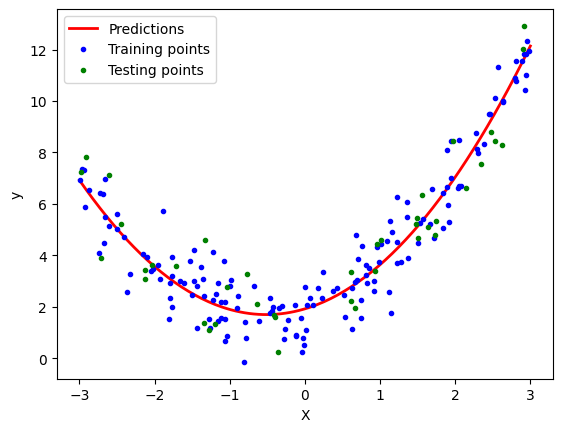

In [21]:
# Plot the predictions using a red solid line, label them as "Predictions," and set the line width to 2.
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

# Plot the training points using blue dots and label them as "Training points."
plt.plot(X_train, y_train, "b.", label='Training points')

# Plot the testing points using green dots and label them as "Testing points."
plt.plot(X_test, y_test, "g.", label='Testing points')

# Set the label for the x-axis.
plt.xlabel("X")

# Set the label for the y-axis.
plt.ylabel("y")

# Display a legend on the plot to distinguish between "Predictions," "Training points," and "Testing points."
plt.legend()

# Show the plot.
plt.show()


###**`Polynomial Regression Function with Visualization:-`**

In [22]:
# Define a function for polynomial regression that takes a 'degree' parameter.
def polynomial_regression(degree):
    # Create a new range of X values for prediction.
    # 'X_new' represents a range of X values over which we want to make predictions.
    # It's created by evenly spacing 100 points from -3 to 3 and reshaped into a column vector.
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)

    # Transform the new X values to polynomial features using the pre-defined 'poly' transformer.
    # 'X_new_poly' will store the X_new values after applying a polynomial feature transformation.
    # The transformation details are based on a pre-defined 'poly' object, which is assumed to have been defined elsewhere.
    X_new_poly = poly.transform(X_new)

    # Create a PolynomialFeatures transformer with the specified 'degree' and exclude the bias term.
    # The 'degree' parameter determines the degree of the polynomial features to be generated.
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)

    # Create a StandardScaler to standardize features.
    # Standardization scales the features to have zero mean and unit variance, which can be important for polynomial regression.
    std_scaler = StandardScaler()

    # Create a LinearRegression model.
    # 'lin_reg' represents a linear regression model that will be used for prediction.
    lin_reg = LinearRegression()

    # Create a Pipeline to chain these steps together:
    #   1. Polynomial feature transformation
    #   2. Standardization
    #   3. Linear regression
    # The pipeline defines a sequence of data preprocessing and modeling steps.
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])

    # Fit the polynomial regression model to the training data (X, y).
    # The model is trained on the input data 'X' and target values 'y'.
    polynomial_regression.fit(X, y)

    # Predict the y values for the new X values.
    # 'y_newbig' will contain the predicted target values for the new X values using the trained model.
    y_newbig = polynomial_regression.predict(X_new)

    # Plot the predicted polynomial regression curve.
    # This code visualizes the predicted curve on top of the original data points.
    # It helps in understanding how well the model fits the data for the specified 'degree'.
    plt.plot(X_new, y_newbig, 'r', label="Degree " + str(degree), linewidth=2)

    # Plot the original training data points in blue.
    # 'X_train' and 'y_train' represent the training data points.
    plt.plot(X_train, y_train, "b.", linewidth=3)

    # Plot the original test data points in green.
    # 'X_test' and 'y_test' represent the test data points.
    plt.plot(X_test, y_test, "g.", linewidth=3)

    # Add a legend to the plot.
    # It helps in distinguishing between the different lines on the plot.
    plt.legend(loc="upper left")

    # Set labels for the X and Y axes.
    plt.xlabel("X")
    plt.ylabel("y")

    # Set the axis limits for the plot.
    plt.axis([-3, 3, 0, 10])

    # Show the plot.
    plt.show()

# Purpose of the code:
# The code defines a function 'polynomial_regression' that performs polynomial regression with various degrees.
# It visualizes the results by plotting the predicted polynomial curves along with the original data points.

# Arguments:
# - 'degree': This parameter determines the degree of the polynomial features used in regression.
#   It controls the complexity of the model. Higher degrees can capture more complex relationships but may overfit the data.


The `plt.axis([-3, 3, 0, 10])` line of code sets the axis limits for a plot using the `matplotlib` library. It specifies the range of values that will be displayed along the x-axis and y-axis of the plot. Here's a breakdown of the arguments:

- `[-3, 3]`: This argument sets the limits for the x-axis. The x-axis will range from -3 (minimum value) to 3 (maximum value). This means that any data or points to be plotted with x-coordinates outside this range will not be shown on the plot.

- `[0, 10]`: This argument sets the limits for the y-axis. The y-axis will range from 0 (minimum value) to 10 (maximum value). Similar to the x-axis, any data or points with y-coordinates outside this range will not be displayed.

In summary, `plt.axis([-3, 3, 0, 10])` is used to set the visible range of the x-axis from -3 to 3 and the visible range of the y-axis from 0 to 10 for a `matplotlib` plot. It defines the boundaries within which data will be plotted. Any data points falling outside these ranges will be clipped or not shown on the plot.

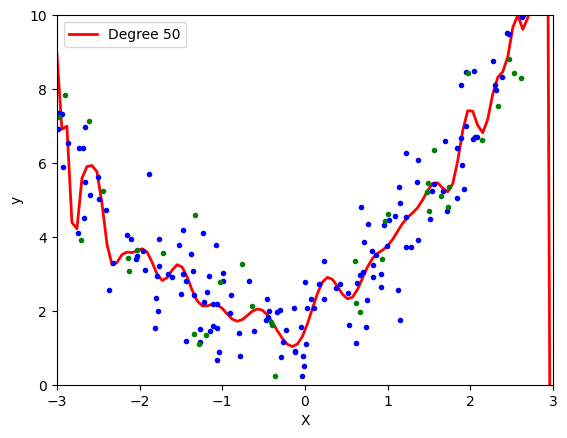

In [23]:
polynomial_regression(50)

###**`Polynomial Regression with Stochastic Gradient Descent (SGD) - Implementation and Visualization:-`**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


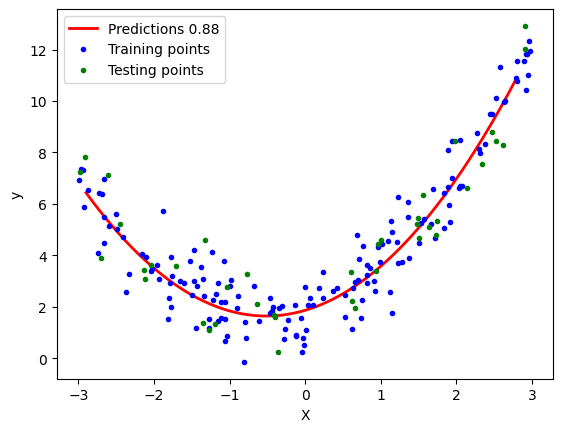

In [24]:
# Import necessary libraries and modules
poly = PolynomialFeatures(degree=2)  # Polynomial feature transformation with degree 2

# Transform the training and testing data into polynomial features
X_train_trans = poly.fit_transform(X_train)  # X_train: Training input data
X_test_trans = poly.transform(X_test)  # X_test: Testing input data

# Create a Stochastic Gradient Descent Regressor model with a maximum of 100 iterations
sgd = SGDRegressor(max_iter=100)

# Fit the SGD Regressor to the training data
sgd.fit(X_train_trans, y_train)  # y_train: Training output/target data

# Generate a new set of data points for prediction, evenly spaced between -2.9 and 2.8
X_new = np.linspace(-2.9, 2.8, 200).reshape(200, 1)  # X_new: New data points to predict
X_new_poly = poly.transform(X_new)  # Transform the new data points into polynomial features

# Predict the target values for the new data points using the trained model
y_new = sgd.predict(X_new_poly)

# Predict the target values for the testing data
y_pred = sgd.predict(X_test_trans)  # y_pred: Predicted values for the testing data

# Plot the results
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test, y_pred), 2)))
plt.plot(X_train, y_train, "b.", label='Training points')  # X_train: Training input data, y_train: Training output data
plt.plot(X_test, y_test, "g.", label='Testing points')  # X_test: Testing input data, y_test: Testing output data
plt.xlabel("X")  # X-axis label
plt.ylabel("y")  # Y-axis label
plt.legend()  # Display legend
plt.show()

# The purpose of the above code:
# - It applies polynomial feature transformation to input data.
# - Trains a Stochastic Gradient Descent Regressor model on the transformed training data.
# - Generates new data points for prediction.
# - Predicts the target values for both the new data points and the testing data.
# - Plots the training and testing data along with the predictions to visualize the model's performance.


###**`Polynomial Regression with SGD Pipeline and Visualization:-`**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


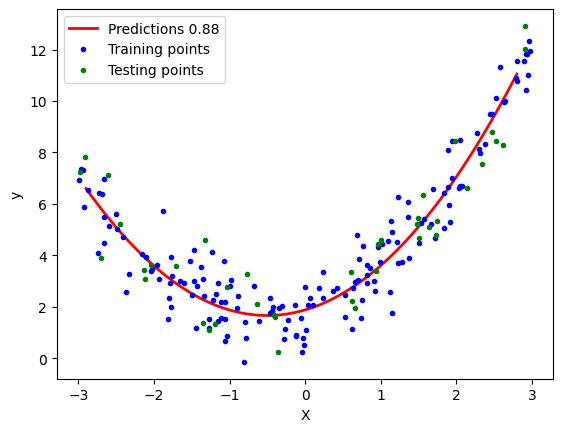

In [25]:

# Create a Polynomial Regression Pipeline
poly_sgd_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Polynomial feature transformation with degree 2
    ('sgd_reg', SGDRegressor(max_iter=100))  # Stochastic Gradient Descent Regressor
])

# Fit the Pipeline to the training data
poly_sgd_pipeline.fit(X_train, y_train)  # X_train: Training input data, y_train: Training output data

# Generate a new set of data points for prediction, evenly spaced between -2.9 and 2.8
X_new = np.linspace(-2.9, 2.8, 200).reshape(200, 1)  # X_new: New data points to predict

# Predict the target values for the new data points using the trained model
y_new = poly_sgd_pipeline.predict(X_new)

# Predict the target values for the testing data
y_pred = poly_sgd_pipeline.predict(X_test)  # X_test: Testing input data, y_pred: Predicted values for the testing data

# Plot the results
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test, y_pred), 2)))
plt.plot(X_train, y_train, "b.", label='Training points')  # X_train: Training input data, y_train: Training output data
plt.plot(X_test, y_test, "g.", label='Testing points')  # X_test: Testing input data, y_test: Testing output data
plt.xlabel("X")  # X-axis label
plt.ylabel("y")  # Y-axis label
plt.legend()  # Display legend
plt.show()

# The purpose of the above code:
# - It creates a Pipeline that combines polynomial feature transformation and SGD regression.
# - Fits the Pipeline to the training data, including feature transformation.
# - Generates new data points for prediction.
# - Predicts the target values for both the new data points and the testing data.
# - Plots the training and testing data along with the predictions to visualize the model's performance.


###**`Generating Synthetic Data for 3D Polynomial Regression:-`**

In [37]:
import numpy as np

# Generate random data points for x and y
x = 7 * np.random.rand(100, 1) - 2.8  # Random values in the range [-2.8, 4.2]
y = 7 * np.random.rand(100, 1) - 2.8  # Random values in the range [-2.8, 4.2]

# Generate a 3D polynomial surface with noise
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2 + random noise
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100, 1)

# This code is written to generate synthetic data points (x, y, z) that follow a 3D polynomial relationship.
# The variables x and y represent input features.
# The variable z represents the output or target variable.
# The generated data is noisy to simulate real-world scenarios where data may not be perfectly clean.
# The polynomial function used is z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2 with added random noise.
# The purpose of this code to test and demonstrate polynomial regression .


In [38]:
# Import the necessary library: Plotly Express
import plotly.express as px

# Load the Iris dataset provided by Plotly Express
df = px.data.iris()

# Create a 3D scatter plot using Plotly Express
# Define the x, y, and z coordinates for the plot
x = x.ravel()
y = y.ravel()
z = z.ravel()
fig = px.scatter_3d(df, x=x, y=y, z=z)

# Display the 3D scatter plot
fig.show()

# This code is written to create a 3D scatter plot using Plotly Express.
# The dataset 'df' is loaded from the Iris dataset provided by Plotly Express.
# The variables 'x', 'y', and 'z' are used to define the coordinates of the 3D plot,
# and you should replace them with your actual data or variables.
# The code then displays the 3D scatter plot.
# Note that 'x', 'y', and 'z' should be previously defined or replaced with the appropriate data.


This code generates a 3D scatter plot using Plotly Express to visualize data. Here's how it works, along with the role of each argument:

1. `import plotly.express as px`: Import the Plotly Express library with the alias `px`.

2. `df = px.data.iris()`: Load the Iris dataset provided by Plotly Express into a DataFrame called `df`. This dataset contains information about different species of iris flowers, including their petal and sepal measurements.

3. Define the coordinates for the 3D scatter plot:
   - `x`, `y`, and `z` are arrays that define the coordinates in 3D space. These arrays should be previously defined or replaced with appropriate data. In the code snippet you provided, it seems that `x`, `y`, and `z` are being flattened (`ravel()`) arrays or variables. These variables determine where the data points will be placed along the x, y, and z axes in the 3D plot.

4. `fig = px.scatter_3d(df, x=x, y=y, z=z)`: Create the 3D scatter plot using Plotly Express. This line of code:
   - Specifies the DataFrame `df` as the data source for the plot.
   - Sets the x, y, and z coordinates of the data points based on the values in the `x`, `y`, and `z` arrays or variables.
   - `px.scatter_3d` is a function from Plotly Express that creates a 3D scatter plot, and `fig` is assigned as the figure object that holds this plot.

5. `fig.show()`: Display the 3D scatter plot. This line of code shows the plot that was created using `fig`.

In summary, this code snippet generates a 3D scatter plot using Plotly Express. It loads data from the Iris dataset, defines the x, y, and z coordinates for the plot, and then displays the resulting 3D scatter plot. The role of each argument is to specify the data, coordinates, and other plot settings to create the visualization.

In [39]:
# Create a LinearRegression model instance.
lr = LinearRegression()

# Fit the LinearRegression model using the provided data.
# The input data is reshaped to (100, 2), where the first column represents 'x' values and the second column represents 'y' values.
# The 'z' variable represents the target variable.
lr.fit(np.array([x, y]).reshape(100, 2), z)

# Generate 'x_input' and 'y_input' values that evenly span the range of 'x' and 'y' values.
# Here, you are preparing a grid of input points to make predictions.
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)

# Create a 2D grid of 'x_input' and 'y_input' values using 'meshgrid'.
# This creates two 2D arrays, 'xGrid' and 'yGrid', representing all possible combinations of 'x' and 'y' input values.
xGrid, yGrid = np.meshgrid(x_input, y_input)

# Stack the flattened versions of 'xGrid' and 'yGrid' to create a 2D array 'final'.
# Each row of 'final' represents a combination of 'x' and 'y' input values for prediction.
final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T

# Use the trained LinearRegression model to predict 'z' values for the input combinations in 'final'.
# The result is reshaped into a 2D array 'z_final' with a shape of (10, 10) to match the 'xGrid' and 'yGrid' dimensions.
z_final = lr.predict(final).reshape(10, 10)


The line `xGrid, yGrid = np.meshgrid(x_input, y_input)` will create two 2D grids, `xGrid` and `yGrid`, using the input arrays `x_input` and `y_input`. These grids represent all possible combinations of 'x' and 'y' values on a 2D plane.

Here's a breakdown of what happens:

- `x_input` and `y_input` are assumed to be 1D arrays containing a set of 'x' and 'y' values, respectively.

- `np.meshgrid(x_input, y_input)` takes these two 1D arrays and returns two 2D arrays:
  - `xGrid`: This 2D array contains repeated 'x_input' values along its rows. Each row of `xGrid` corresponds to the same 'x' value, and the values in each row span the entire range of 'y' values.
  - `yGrid`: This 2D array contains repeated 'y_input' values along its columns. Each column of `yGrid` corresponds to the same 'y' value, and the values in each column span the entire range of 'x' values.

In essence, `xGrid` and `yGrid` represent a grid of points where each combination of 'x' and 'y' values from `x_input` and `y_input` is represented in a 2D fashion. These grids are commonly used for creating 3D surface plots or for performing operations involving every pair of 'x' and 'y' values from the input arrays.

In [52]:
np.array([x, y]).shape

(2, 100)

In [ ]:
np.array([x, y]).reshape(100, 2)

In [47]:
(7 * np.random.rand(100, 1) - 2.8).shape

(100, 1)

In [48]:
x.shape

(100,)

In [49]:
x_input.shape

(10,)

In [50]:
xGrid.shape

(10, 10)

In [ ]:
final

The provided code generates a 3D surface plot using a Linear Regression model to predict `z` values based on `x` and `y` input data. Let's break down how this plot is generated and the role of each argument:

1. `lr = LinearRegression()`: This line creates an instance of the `LinearRegression` model. `lr` will be used to fit the linear regression model to the provided data.

2. `lr.fit(np.array([x, y]).reshape(100, 2), z)`: Here, the linear regression model (`lr`) is fitted using the provided data.
   - `np.array([x, y]).reshape(100, 2)` is used to create a 2D array where the first column represents 'x' values, the second column represents 'y' values, and there are 100 data points in total.
   - `z` represents the target variable that we want to predict based on 'x' and 'y'.

3. `x_input = np.linspace(x.min(), x.max(), 10)`: This line generates evenly spaced `x` input values (`x_input`) that span the range of the original 'x' values. It creates 10 values.

4. `y_input = np.linspace(y.min(), y.max(), 10)`: Similar to the previous line, this generates evenly spaced `y` input values (`y_input`) that span the range of the original 'y' values.

5. `xGrid, yGrid = np.meshgrid(x_input, y_input)`: Here, `meshgrid` is used to create a 2D grid of input values.
   - `xGrid` and `yGrid` are 2D arrays that represent all possible combinations of 'x' and 'y' input values. `xGrid` varies only in the 'x' direction, while `yGrid` varies only in the 'y' direction.

6. `np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T`: This line stacks the flattened versions of `xGrid` and `yGrid` to create a 2D array `final`.
   - `xGrid.ravel()` and `yGrid.ravel()` flatten the 2D arrays into 1D arrays.
   - The flattened arrays are stacked vertically using `np.vstack`.
   - `.reshape(1, 100)` reshapes the stacked array into the desired shape where each row represents a combination of 'x' and 'y' input values.
   - `.T` transposes the array to match the dimensions expected by the linear regression model.

7. `z_final = lr.predict(final).reshape(10, 10)`: Here, the trained linear regression model (`lr`) is used to predict `z` values for the input combinations in `final`.
   - `lr.predict(final)` computes the predicted `z` values.
   - `.reshape(10, 10)` reshapes the predicted values into a 2D array `z_final` with dimensions (10, 10) to match the `xGrid` and `yGrid` dimensions.

8. Finally, `z_final` contains the predicted `z` values for each combination of 'x' and 'y' input values. This `z_final` data is used to create the 3D surface plot in the subsequent part of your code.

Overall, this code prepares the input data, fits a linear regression model, generates a grid of input values for prediction, and computes the predicted `z` values for each combination of 'x' and 'y'. The result is a 3D surface plot representing the relationship between 'x', 'y', and 'z' based on the linear regression model's predictions.

In [54]:
# Import the necessary library for creating 3D plots using Plotly
import plotly.graph_objects as go

# Create a 3D scatter plot using Plotly Express (px) with your DataFrame 'df'
# x, y, and z are assumed to be numpy arrays or lists containing your data
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

# Add a 3D surface plot to the existing scatter plot
# x_input, y_input, and z_final are assumed to be numpy arrays or lists containing data
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))

# Display the combined 3D plot
fig.show()


In [55]:
# x and y are previously defined arrays with 100 elements each.
# X_multi is created by stacking x and y together as columns to form a 2D array with 100 rows and 2 columns.
X_multi = np.array([x, y]).reshape(100, 2)

# Displaying the shape of the X_multi array
# It should be (100, 2), meaning it has 100 rows and 2 columns.
X_multi.shape

# The formula below represents what this code accomplishes:
# X_multi = [[x[0], y[0]],
#            [x[1], y[1]],
#            ...
#            [x[99], y[99]]]

# Variables:
# - x: An array containing 100 elements
# - y: Another array containing 100 elements
# - X_multi: A 2D NumPy array created by stacking x and y together, resulting in 100 rows and 2 columns.
# - X_multi.shape: A method that returns the shape of the X_multi array, which should be (100, 2).

# Purpose of the code:
# This code is written to combine two 1D arrays, x and y, into a single 2D array X_multi.
# It reshapes these two arrays into a format where each row contains corresponding elements from x and y.
# This could be useful when working with multi-dimensional data or preparing data for machine learning models.

# Regarding the mention of iris data:
# There is no reference to iris data in the provided code, so it's not clear why iris data is mentioned here.
# If you intend to use iris data in conjunction with this code, you would need to provide additional context and code related to the iris dataset.


(100, 2)

In [56]:
# Import the PolynomialFeatures class from the scikit-learn library
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures class with a degree of 30
# This will generate polynomial features up to degree 30 for each input feature.
poly = PolynomialFeatures(degree=30)

# Transform the input features X_multi by creating polynomial features
# The transformed data will contain all possible combinations of the original features
X_multi_trans = poly.fit_transform(X_multi)

# Formula:
# The formula for PolynomialFeatures transformation is:
# X_poly = [1, X, X^2, X^3, ..., X^n]
# where X is the original feature, X_poly is the transformed feature, and n is the degree specified.

# Variables:
# - poly: An instance of the PolynomialFeatures class with a specified degree.
# - X_multi: The original input features.
# - X_multi_trans: The transformed input features containing polynomial combinations.

# Now, X_multi_trans contains the original features along with their polynomial combinations
# up to the 30th degree, allowing for more complex modeling in machine learning tasks.


In [61]:
# Print the number of input features
print("Input", poly.n_features_in_)

# Print the number of output features (the total number of polynomial features)
print("Output", poly.n_output_features_)

# Print the powers of the polynomial features
print("Powers\n", poly.powers_)


Input 2
Output 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 

In [62]:
X_multi_trans.shape

(100, 496)

In [63]:
# Create a Linear Regression (LR) model instance.
lr = LinearRegression()

# Fit the Linear Regression model to the multi-dimensional input data (X_multi_trans) and target variable (z).
# Linear Regression Formula:
# z = β0 + β1*X1 + β2*X2 + ... + βn*Xn
# - z: Target variable (dependent variable)
# - β0: Intercept (constant term)
# - β1, β2, ..., βn: Coefficients for the independent variables X1, X2, ..., Xn
# - X1, X2, ..., Xn: Independent variables (features)
# In this case, X_multi_trans is a matrix containing multiple features, and z is the target variable.

lr.fit(X_multi_trans, z)


LinearRegression()

In [64]:
X_test_multi = poly.transform(final)

In [65]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [66]:
# x, y, and z are NumPy arrays or data representing 3D scatter plot data
# x: The x-coordinates of data points
# y: The y-coordinates of data points
# z: The z-coordinates of data points

# Create a 3D scatter plot with x, y, and z data
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

# Assuming x_input, y_input, and z_final are also NumPy arrays or data
# x_input: The x-coordinates of additional data points for a surface plot
# y_input: The y-coordinates of additional data points for a surface plot
# z_final: The z-coordinates of the surface plot generated from x_input and y_input

# Add a 3D surface plot to the existing scatter plot
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))

# Update the layout of the 3D plot
fig.update_layout(scene=dict(zaxis=dict(range=[0, 35])))
# Set the z-axis range from 0 to 35

# Display the 3D plot
fig.show()


In [ ]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()